In [1]:
# imports
import pandas as pd
import asyncio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from caller import Caller

# assign plot style
plt.style.use('seaborn')

# get data
apiKey = 'XXXXXXXXXXXXXXXXXXXXXXX' # must be kept private
steamId = '76561198323273142' # profile must be public

caller = Caller(apiKey)
(await caller.getData(steamId)).head(5) # load data and show first few rows


,name,playtime_forever,img_icon_url,has_community_visible_stats,playtime_2weeks,achievement_ratio
appid,,,,,,
24800,Command and Conquer: Red Alert 3 - Uprising,1061,c65f15f9b850a0becaf708a4668e7f285eeff209,False,NaN,NaN
620,Portal 2,847,2e478fc6874d06ae5baf0d147f6f21203291aa02,True,NaN,0.568627
105600,Terraria,29606,858961e95fbf869f136e1770d586e0caefd4cfac,True,NaN,1.000000
220200,Kerbal Space Program,6605,6dc8c1377c6b0ffedaeaec59c253f8c33fb3e62b,False,NaN,NaN
11020,TrackMania Nations Forever,1946,a422db7cb704324da48741b9e0a0cc193b566eb0,False,NaN,NaN


### about the data
Since the api key must be kept private, I've hardcoded some sample user information to run the below, if you wish to run this yourself you can get an api key at https://steamcommunity.com/dev/apikey.

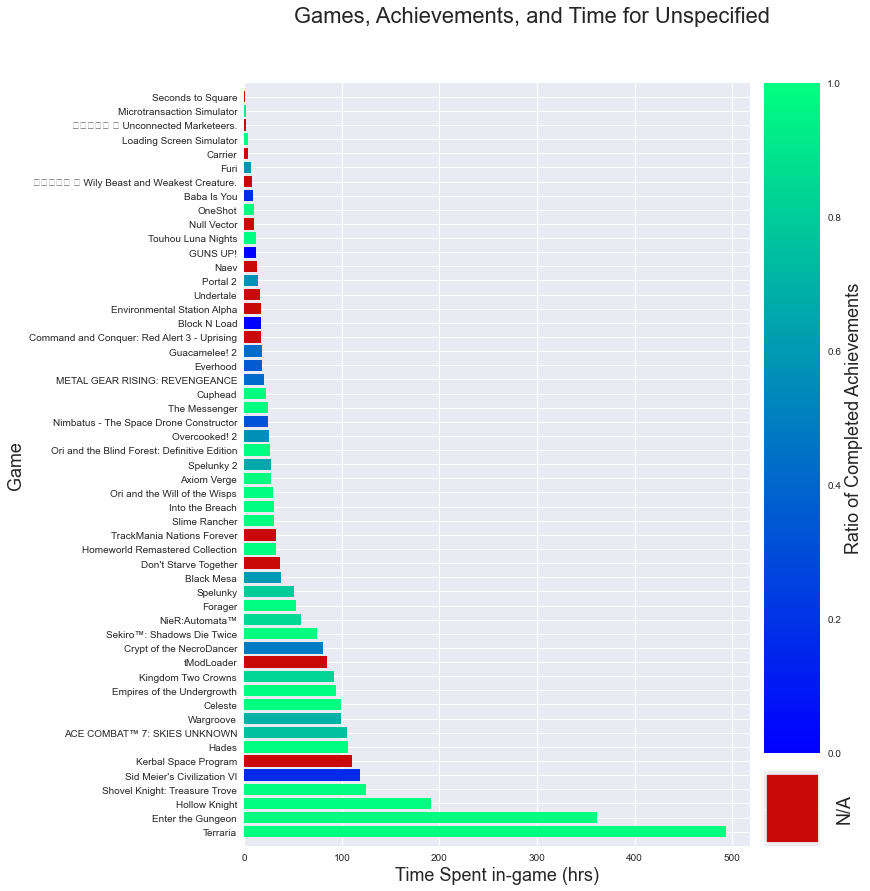

In [3]:
# prepare user data
userData = (await caller.getData(steamId))
userData = userData[userData['playtime_forever']>30] # restrict the domain to games played for atleast half an hour
userData.sort_values(by=['playtime_forever'], ascending=False, inplace=True)

# plotting method
def plot_custom_bar(data, steamName='Unspecified'):
    # create a colour mapping
    cmap = cm.get_cmap('winter', 256)
    red = [202/256, 8/256, 8/256, 1] # assign this colour to games without achievements

    colours = np.array(cmap(userData['achievement_ratio']))
    colours[colours[::,3]==0] = red
    
    #setup plot
    fig = plt.figure(figsize=(10,len(data)/4))
    gs = fig.add_gridspec(2,2,width_ratios=(9,1), height_ratios=(9,1),
                         left=0.1, right=0.9, bottom=0.1, top=0.9,
                         wspace=0.05, hspace=0.05)
    axs = fig.add_subplot(gs[::, 0])
    box = fig.add_subplot(gs[1, 1])
    cbar = fig.add_subplot(gs[0, 1])
    
    # figure
    fig.suptitle(f'Games, Achievements, and Time for {steamName}', fontsize=22)

    # create bar-plot
    axs.barh(data['name'], data['playtime_forever']/60, color=colours)
    axs.set_ylim(-1,len(data))
    axs.set_ylabel('Game',size=18)
    axs.set_xlabel('Time Spent in-game (hrs)',size=18)

    # create black-box
    box.tick_params(axis='x', labelbottom=False)
    box.tick_params(axis='y', labelleft=False)
    box.fill([0,0,1,1], [0,1,1,0], color=red)
    box.yaxis.set_label_coords(1.6,0.5)
    box.set_ylabel('N/A',size=18)

    # create colour-bar
    cb = fig.colorbar(cm.ScalarMappable(cmap=cmap),
                 cax=cbar, orientation='vertical')
    cb.set_label('Ratio of Completed Achievements',size=18)
    
    return fig, [axs,box,cbar]
    
# initial plot
fig, axs = plot_custom_bar(userData)
# to include username in plot title use
#plot_custom_bar(userData, steamName=caller.steamName)

plt.show()

### results from visualisation
From the visualisation it is clear that games with achievements tend to have longer play-times as the ratio of games with achievements to games without achievements increases as you consider games with longer play-times.

This does not indicate that games with achievements are played longer than games without achievements, the discrepency may be accounted for by a games production budget and industry standards, notice how (atleast in the case above) games without achievements tend to be indie games developed by small teams (usually around 1-2 people) (with exceptions like TrackMania Nations Forever and Kerbal Space Program, both games with large teams behind them, having significantly longer playtimes than their indie counterparts), this suggests that games without achievements are so either due to a delibirate decision (like in the case of KSP, a space sim) or due to budget constraints, while games produced by large teams tend to include achievements as they are industry standard.

This also makes sense in context of older games, like Red Alert 3 which lacks acheivements and is a game made in 2009, before achievements were mainstream (atleast to the extent they are now). This suggests that achievements in video-games do not incease time spent playing (and hopefully enjoying) the game (but noteably not including achievements in a major release may lead to decrease in sales by amassing bad impressions and so is unadviseable).